# Exercise Round 5

In [10]:
import matplotlib.pyplot as plt
import numpy as np

## The measurement model and Jacobian

In [11]:
def g(x):
    return np.array([np.sin(x[0] + x[1]) + x[1], 1 - x[0]])

def J(x):
    return np.array([[np.cos(x[0] + x[1]), np.cos(x[0] + x[1]) + 1],
                     [-1,0]])

x = np.array([1.0,2.0])
J(x)

array([[-0.9899925,  0.0100075],
       [-1.       ,  0.       ]])

## Simulate data

In [12]:
sigma = 0.1
R = np.diag([sigma**2,sigma**2])
Ri = np.linalg.inv(R)
np.random.seed(2)
y = g(x) + np.random.normal(0,sigma,2)
print(y)

[ 2.09944422 -0.00562668]


## The cost function J(x)

In [13]:
def cost(x):
    return (y - g(x)).T @ np.linalg.inv(R) @ (y - g(x))


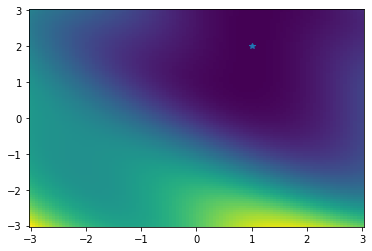

In [14]:
def plot_cost():
    x0s = np.linspace(-3,3,100)
    x1s = np.linspace(-3,3,100)
    gridx0, gridx1 = np.meshgrid(x0s,x1s)
    z = np.zeros(gridx0.shape)
    for i in range(gridx0.shape[0]):
        for j in range(gridx0.shape[1]):
            cx = np.array([gridx0[i,j],gridx1[i,j]])
            z[i,j] = cost(cx)
    plt.pcolor(x0s,x1s,z,shading='auto')

plt.clf()
plot_cost()
plt.plot(x[0],x[1],'*')


## Gauss-Newton with line search (grid search)

In [15]:
x_est = np.array([2.3,0.7])
N = 10
x0_path = np.zeros(N+1)
x1_path = np.zeros(N+1)
x0_path[0] = x_est[0]
x1_path[0] = x_est[1]
for i in range(N):
    Gv = J(x_est)
    dx = np.linalg.solve(Gv.T @ Ri @ Gv, Gv.T @ Ri @ (y - g(x_est)))
    
    min_cost = cost(x_est)
    min_gam = 0
    grid_n = 10
    for j in range(1,grid_n+1):
        gam = j / grid_n
        curr_cost = cost(x_est + gam * dx)
        if curr_cost < min_cost:
            min_gam = gam
            min_cost = curr_cost

    x_est = x_est + min_gam * dx
    x0_path[i+1] = x_est[0]
    x1_path[i+1] = x_est[1]
    print(x_est)

[1.911688  0.0076498]
[1.00562668 1.28709225]
[1.00562668 1.46934648]
[1.00562668 1.52430173]
[1.00562668 1.52933043]
[1.00562668 1.52937102]
[1.00562668 1.52937102]
[1.00562668 1.52937102]
[1.00562668 1.52937102]
[1.00562668 1.52937102]


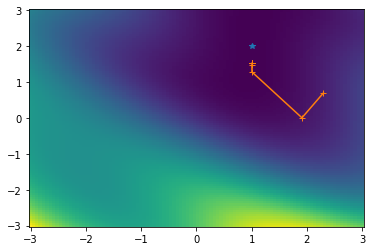

In [7]:
plt.clf()
plot_cost()
plt.plot(x[0],x[1],'*')
plt.plot(x0_path,x1_path,'+-')


## Levenberg-Marquardt

In [8]:
x_est = np.array([2.3,0.7])
N = 10
x0_path = np.zeros(N+1)
x1_path = np.zeros(N+1)
x0_path[0] = x_est[0]
x1_path[0] = x_est[1]
lam = 0.01
nu = 10
I = np.eye(Gv.shape[1])
for i in range(N):
    Gv = J(x_est)
#    dx = np.linalg.solve(Gv.T @ Ri @ Gv, Gv.T @ Ri @ (y - g(x_est))) # GN
#    dx = np.linalg.solve(Gv.T @ Ri @ Gv + lam * I, Gv.T @ Ri @ (y - g(x_est)))
    dx = np.linalg.solve(Gv.T @ Ri @ Gv + lam * np.diag(np.diag(Gv.T @ Ri @ Gv)), Gv.T @ Ri @ (y - g(x_est)))
    
    if cost(x_est + dx) < cost(x_est):
        x_est = x_est + dx
        lam = lam / nu
    else:
        lam = lam * nu
        
    x0_path[i+1] = x_est[0]
    x1_path[i+1] = x_est[1]
    print(str(x_est) + ' ' + str(lam))

[1.03074175 0.87492498] 0.001
[1.00556534 1.27936285] 0.0001
[1.00562245 1.4661543 ] 1e-05
[1.00562659 1.52378242] 1.0000000000000002e-06
[1.00562668 1.52932173] 1.0000000000000002e-07
[1.00562668 1.52937102] 1.0000000000000002e-08
[1.00562668 1.52937102] 1.0000000000000003e-09
[1.00562668 1.52937102] 1.0000000000000004e-08
[1.00562668 1.52937102] 1.0000000000000004e-07
[1.00562668 1.52937102] 1.0000000000000004e-06


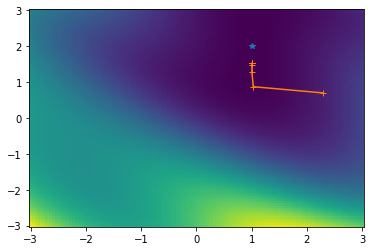

In [9]:
plt.clf()
plot_cost()
plt.plot(x[0],x[1],'*')
plt.plot(x0_path,x1_path,'+-')
